We will use scikit-learn package, one of the core ML packages in python.

https://scikit-learn.org/stable/index.html
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

It covers topics like:
- regression
- classification 
- clustering
- dimensionality reduction
- model selection
- preprocessing

### Load Packages

In [32]:
import numpy as np # package to get numpy functionality, e.g., arrays with elementwise operations, vectorization
import pandas as pd # package to work with data frames
import matplotlib.pyplot as plt # standard package for visualisation
import seaborn as sns # package for statistical visualisation, more convenient for data analysis
%matplotlib inline 
# magical function to plot in the notebook 

### Set Constants

In [33]:
rs = 42

### Import Data
we will use Titanic dataset, where you need to predict whether passenger will survive or not.
You can find it on kaggle website: https://www.kaggle.com/c/titanic/data

In [34]:
train  = pd.read_csv("./titanic_data/titanic/train.csv") 
test   = pd.read_csv("./titanic_data/titanic/test.csv") 

### Explore data

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

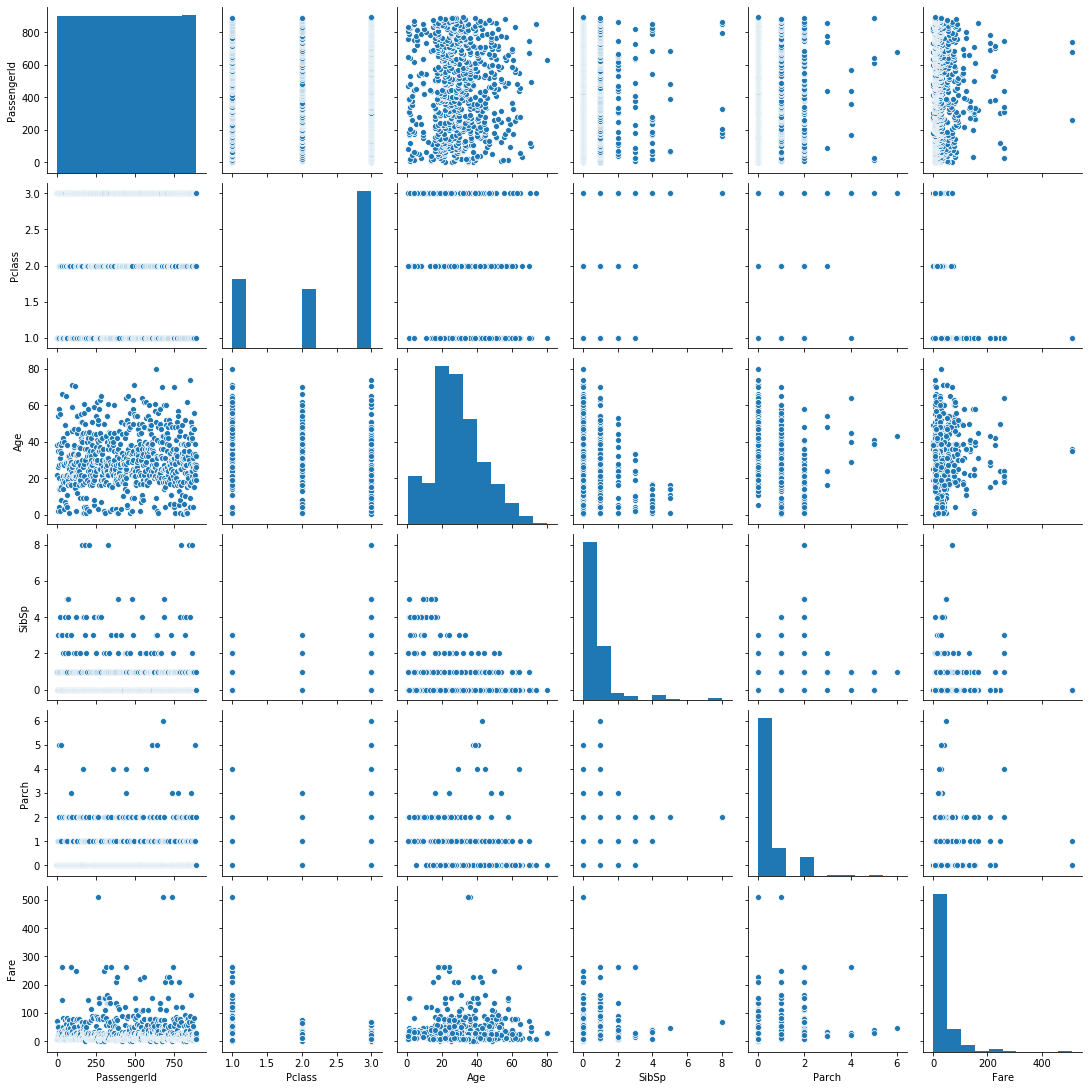

In [16]:
sns.pairplot(train.drop('Survived', axis=1))

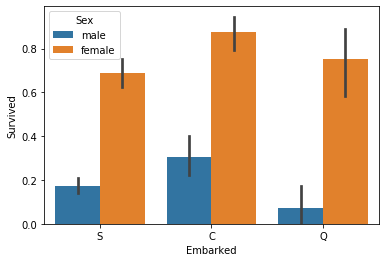

In [18]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train)

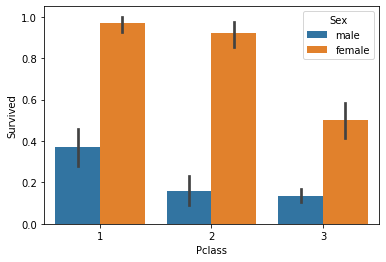

In [19]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)

### Fill missing values

In [12]:
train.shape

(891, 12)

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1) How we can fill in the NAs?

2) And for the test data?

3) What could be the problem with filling in the data here?

### Prepare categorical variables
https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [36]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train['Sex'] = train['Sex'].map({'male': 0,
                                'female': 1})
test['Sex']  = test['Sex'].map({'male': 0,
                                'female': 1})

The same question: what could be the problem with encoding here the data?


### Train-test split or here train-validation split

In [38]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

num_test = 0.20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=num_test, random_state=rs)
X_test = test

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# choose the type of classifier
clf = RandomForestClassifier(n_estimators=100, random_state=rs)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

Why do you think we get this error?

In [40]:
# Fill NAs

X_train = X_train.drop('Cabin', axis=1)
X_val   = X_val.drop('Cabin', axis=1)
X_test  = X_test.drop('Cabin', axis=1)

mean_age = X_train.Age.mean()
X_train.Age.fillna(value=mean_age, inplace=True)
X_val.Age.fillna(value=mean_age, inplace=True)
X_test.Age.fillna(value=mean_age, inplace=True)
#why do we use mean age of the train data

X_train.Embarked.fillna(value='Missing', inplace=True)
X_val.Embarked.fillna(value='Missing', inplace=True)
X_test.Embarked.fillna(value='Missing', inplace=True)

X_test.Fare.fillna(value=0, inplace=True)

In [41]:
# Encoding
ehe = OneHotEncoder()
ehe.fit(X_train[['Pclass']])

X_train['Pclass_1'], X_train['Pclass_2'], X_train['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_train[['Pclass']]).toarray())
X_val['Pclass_1'], X_val['Pclass_2'], X_val['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_val[['Pclass']]).toarray())
X_test['Pclass_1'], X_test['Pclass_2'], X_test['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_test[['Pclass']]).toarray())

In [42]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        

In [43]:
# alternatively you can use pd.get_dummies
new_feat_df = pd.get_dummies(X_train['Embarked'], prefix='Embarked_')
X_train[list(new_feat_df.columns)] = new_feat_df

new_feat_df_val = pd.get_dummies(X_val['Embarked'], prefix='Embarked_')
X_val[list(new_feat_df_val.columns)] = new_feat_df_val

new_feat_df_test = pd.get_dummies(X_test['Embarked'], prefix='Embarked_')
X_test[list(new_feat_df_test.columns)] = new_feat_df_test

In [44]:
# What could be the problem with this approach?

In [45]:
X_val['Embarked__Missing'] = 0
X_test['Embarked__Missing'] = 0

In [46]:
X_train.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
X_val.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
X_test.drop(['Pclass', 'Embarked'], axis=1, inplace=True)

In [47]:
X_train.columns

Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked__C', 'Embarked__Missing',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [48]:
# LabelEncoding
le = LabelEncoder()
le.fit(X_train['Ticket'])
X_train['Ticket'] = le.fit_transform(X_train['Ticket'])
X_val['Ticket'] = le.fit_transform(X_val['Ticket'])
X_test['Ticket'] = le.fit_transform(X_test['Ticket'])

In [54]:
for fold, nt in enumerate(range(1, 50, 10)):
    clf = RandomForestClassifier(n_estimators=nt, random_state=rs) #change to 10
    clf.fit(X_train.drop('Name', axis=1), y_train)
    predictions = clf.predict(X_val.drop('Name', axis=1))
    print(f'{fold} {nt}:  {accuracy_score(y_val, predictions)}')

0 1:  0.6815642458100558
1 11:  0.7877094972067039
2 21:  0.7653631284916201
3 31:  0.7877094972067039
4 41:  0.776536312849162


In [51]:
predictions = clf.predict(X_val.drop('Name', axis=1))
print(accuracy_score(y_val, predictions))

0.7821229050279329


In [110]:
# let's try to change the parameters
# what is wrong with this approach?
# Solution -> Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9, 100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 8, 10]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train.drop('Name', axis=1), y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train.drop('Name', axis=1), y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
predictions = clf.predict(X_val.drop('Name', axis=1))
print(accuracy_score(y_val, predictions))

0.7988826815642458


In [139]:
X_test.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked__C', 'Embarked__Q',
       'Embarked__S', 'Embarked__Missing'],
      dtype='object')

In [58]:
predictions = clf.predict(X_test.drop(['PassengerId','Name'], axis=1))

In [144]:
pred_df = X_test[['PassengerId']]
pred_df['Survived'] = predictions
pred_df.to_csv('./titanic_data/titanic/pred_nocv.csv', index=False)

/Users/lizzzi111/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1) what is the alternative to the train validation split?

2) why we would want to use it?

In [59]:
from sklearn.model_selection import KFold, StratifiedKFold

What is the difference between KFOld and Stratified?

In [60]:
skf = StratifiedKFold(n_splits=10, random_state=rs, shuffle=True)

In [62]:
accuracy = []

In [63]:
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_val = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        X_test         = test.copy()

        # Fill NAs
        X_train = X_train.drop('Cabin', axis=1)
        X_val   = X_val.drop('Cabin', axis=1)
        X_test  = X_test.drop('Cabin', axis=1)

        mean_age = X_train.Age.mean()
        X_train.Age.fillna(value=mean_age, inplace=True)
        X_val.Age.fillna(value=mean_age, inplace=True)
        X_test.Age.fillna(value=mean_age, inplace=True)
        

        X_train.Embarked.fillna(value='Missing', inplace=True)
        X_val.Embarked.fillna(value='Missing', inplace=True)
        X_test.Embarked.fillna(value='Missing', inplace=True)

        X_test.Fare.fillna(value=0, inplace=True)
        
        # Encoding
        # Encoding
        ehe = OneHotEncoder()
        ehe.fit(X_train[['Pclass']])

        X_train['Pclass_1'], X_train['Pclass_2'], X_train['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_train[['Pclass']]).toarray())
        X_val['Pclass_1'], X_val['Pclass_2'], X_val['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_val[['Pclass']]).toarray())
        X_test['Pclass_1'], X_test['Pclass_2'], X_test['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_test[['Pclass']]).toarray())
        
        # alternatively you can use pd.get_dummies
        new_feat_df = pd.get_dummies(X_train['Embarked'], prefix='Embarked_')
        X_train[list(new_feat_df.columns)] = new_feat_df

        new_feat_df_val = pd.get_dummies(X_val['Embarked'], prefix='Embarked_')
        X_val[list(new_feat_df_val.columns)] = new_feat_df_val

        new_feat_df_test = pd.get_dummies(X_test['Embarked'], prefix='Embarked_')
        X_test[list(new_feat_df_test.columns)] = new_feat_df_test
        
        for feat in ['Embarked__C', 'Embarked__Missing', 'Embarked__Q', 'Embarked__S']:
            if feat not in X_train.columns:
                X_train[feat] = 0
            if feat not in X_val.columns:
                X_val[feat] = 0
            if feat not in X_test.columns:
                X_test[feat] = 0
        
        # LabelEncoding
        le = LabelEncoder()
        le.fit(X_train['Ticket'])
        X_train['Ticket'] = le.fit_transform(X_train['Ticket'])
        X_val['Ticket'] = le.fit_transform(X_val['Ticket'])
        X_test['Ticket'] = le.fit_transform(X_test['Ticket'])
        
        X_train.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
        X_val.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
        X_test.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
 
        clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=10, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=3,
                                       min_weight_fraction_leaf=0.0, n_estimators=100,
                                       n_jobs=None, oob_score=False, random_state=rs,
                                       verbose=0, warm_start=False) 
        clf.fit(X_train.drop('Name', axis=1), y_train)
        predictions = clf.predict(X_val.drop('Name', axis=1))
        print('__________________________________________\n')
        print(f'Fold {fold}: {accuracy_score(y_val, predictions)}')
        print('__________________________________________\n')
        accuracy.append(accuracy_score(y_val, predictions))
acc = np.array(accuracy).mean()
print(f'CV accuracy is {round(acc, 5)}')

__________________________________________

Fold 0: 0.7666666666666667
__________________________________________

__________________________________________

Fold 1: 0.8089887640449438
__________________________________________

__________________________________________

Fold 2: 0.7865168539325843
__________________________________________

__________________________________________

Fold 3: 0.8089887640449438
__________________________________________

__________________________________________

Fold 4: 0.7415730337078652
__________________________________________

__________________________________________

Fold 5: 0.7752808988764045
__________________________________________

__________________________________________

Fold 6: 0.7865168539325843
__________________________________________

__________________________________________

Fold 7: 0.7752808988764045
__________________________________________

__________________________________________

Fold 8: 0.797752808988764
__________

Competition vs. Research

In [173]:
X_test = test.copy()
# Fill NAs
X = X.drop('Cabin', axis=1)
X_test  = X_test.drop('Cabin', axis=1)

mean_age = X.Age.mean()
X.Age.fillna(value=mean_age, inplace=True)
X_test.Age.fillna(value=mean_age, inplace=True)


X.Embarked.fillna(value='Missing', inplace=True)
X_test.Embarked.fillna(value='Missing', inplace=True)

X_test.Fare.fillna(value=0, inplace=True)

# Encoding
# Encoding
ehe = OneHotEncoder()
ehe.fit(X[['Pclass']])

X['Pclass_1'], X['Pclass_2'], X['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X[['Pclass']]).toarray())
X_test['Pclass_1'], X_test['Pclass_2'], X_test['Pclass_3'] = pd.DataFrame(ehe.fit_transform(X_test[['Pclass']]).toarray())

# alternatively you can use pd.get_dummies
new_feat_df = pd.get_dummies(X['Embarked'], prefix='Embarked_')
X[list(new_feat_df.columns)] = new_feat_df

new_feat_df_test = pd.get_dummies(X_test['Embarked'], prefix='Embarked_')
X_test[list(new_feat_df_test.columns)] = new_feat_df_test

for feat in ['Embarked__C', 'Embarked__Missing', 'Embarked__Q', 'Embarked__S']:
    if feat not in X.columns:
        X_train[feat] = 0
    if feat not in X_test.columns:
        X_test[feat] = 0

# LabelEncoding
le = LabelEncoder()
le.fit(X['Ticket'])
X['Ticket'] = le.fit_transform(X['Ticket'])
X_test['Ticket'] = le.fit_transform(X_test['Ticket'])

X.drop(['Pclass', 'Embarked'], axis=1, inplace=True)
X_test.drop(['Pclass', 'Embarked'], axis=1, inplace=True)

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=10, max_features='auto',
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=3,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=rs,
                               verbose=0, warm_start=False) 
clf.fit(X.drop('Name', axis=1), y)
predictions = clf.predict(X_test.drop(['PassengerId','Name'], axis=1))
pred_df = test[['PassengerId']]
pred_df['Survived'] = predictions
pred_df.to_csv('./titanic_data/titanic/pred_all.csv', index=False)

/Users/lizzzi111/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
